Author: Har Jing Daryl

Student No.: A0248936M

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

DIAG_SIZE = 7

# Introduction

## Parameters
The results were run using the following parameters:

1. Batch sizes of {1, 2, 4}.

2. Data unit sizes ranging from [50, 900] in increments of 50.

3. Each permutation was repeated 100 times.

## Assumptions
A few assumptions are made when reading the results:

1. There are no errors when using the UDP protocol.

# Results

In [2]:
# Read results
results = pd.read_csv("results.csv")
results

,du_size,batch_size,transfer_time,throughput
0,50,1,25.683,2328.077
1,50,1,17.371,3442.059
2,50,1,14.593,4097.307
3,50,1,14.663,4077.747
4,50,1,14.592,4097.588
...,...,...,...,...
5395,900,4,0.684,87415.205
5396,900,4,0.687,87033.479
5397,900,4,0.679,88058.910
5398,900,4,0.753,79405.046


In [3]:
# Average values for each permutation.
results_agg = results.groupby(["du_size", "batch_size"]).mean()
results_agg

transfer_time    throughput
du_size batch_size                             
50      1                21.83846    2857.63481
        2                 9.13803    6936.33393
        4                 3.91587   15284.93515
100     1                10.32328    6297.53351
        2                 6.88000    9102.53853
        4                 2.47042   24965.91558
150     1                 5.90472   10316.93654
        2                 3.01932   20060.69915
        4                 2.22408   28667.42997
200     1                 5.33943   11773.60001
        2                 3.81460   16289.76876
        4                 2.60580   23074.68424
250     1                 5.88246   10602.51523
        2                 2.92675   20611.98746
        4                 2.07852   28953.29541
300     1                 5.13032   11974.87438
        2                 2.91500   20896.09421
        4                 1.69250   35888.43608
350     1                 4.38238   13871.92606
        2                 2.40617   25144.57802
        4                 1.42761   42323.16222
400     1                 3.78278   16075.94462
        2                 2.22067   27277.51060
        4                 1.18478   51675.15932
450     1                 3.49020   17381.64694
        2                 1.82966   33456.89506
        4                 1.11606   54227.78947
500     1                 3.13065   19441.10211
        2                 1.68522   36042.90343
        4                 0.96593   62671.26991
550     1                 2.54185   23718.34938
        2                 0.93690   68219.57888
        4                 0.46271  132691.68067
600     1                 1.39657   43458.07032
        2                 0.79431   76256.27151
        4                 0.43972  140795.17342
650     1                 1.41289   43099.80525
        2                 0.72439   84851.56152
        4                 0.36481  164613.62170
700     1                 1.60326   39013.59152
        2                 1.10886   55525.16295
        4                 0.80856   80555.82720
750     1                 1.65861   37239.79528
        2                 0.96674   62330.35452
        4                 0.59646  105598.19283
800     1                 2.87206   35104.52301
        2                 1.12290   54123.70824
        4                 0.71820   84570.92402
850     1                 1.97813   30619.67892
        2                 0.89658   67345.76768
        4                 0.62071   97810.95927
900     1                 1.62076   37336.65160
        2                 0.87566   69990.51587
        4                 0.61288  100884.44307

# Transfer time vs data unit size (for batch_size 1, 2, and 4)


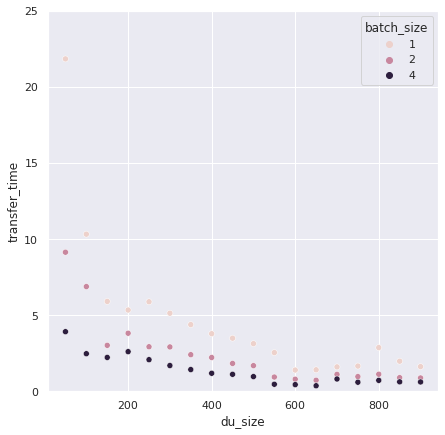

In [4]:
p = sb.scatterplot(data=results_agg, x="du_size", y="transfer_time", hue="batch_size")
p.set(ylim=(0, 25))  # Remove certain anomalous results
p.figure.set_size_inches(DIAG_SIZE, DIAG_SIZE)

## Effect of data unit size on transfer time

It can clearly be seen that a higher data unit size results in significantly lower transfer times.

## Effect of batch size on transfer time

It can also be seen that a higher batch size will also reduce transfer time for similar data unit sizes.

# Throughput vs data unit size (for batch_size 1, 2, and 4)

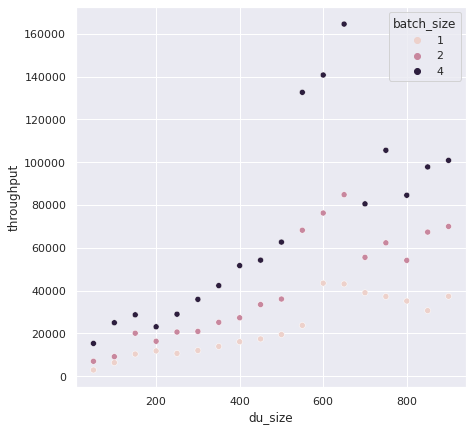

In [5]:
p = sb.scatterplot(data=results_agg, x="du_size", y="throughput", hue="batch_size")
p.figure.set_size_inches(DIAG_SIZE, DIAG_SIZE)

## Effect of data unit size on throughput

It can clearly be seen that a higher data unit size will result in higher throughput.

## Effect of batch size on throughput.

Similarly, a higher batch size will also result in better throughput for similar data unit sizes.